<a href="https://colab.research.google.com/github/NagrajSrivatsa15/FakeNewsDL/blob/main/Fake_news_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Visualization
!pip install wordcloud

In [1]:
!pip install gensim

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Visualization
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
#dataset
Dataset_True=pd.read_csv('/content/True.csv')

In [6]:
Dataset_True['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

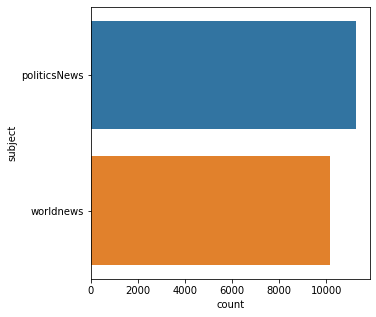

In [7]:
#Visualization
#Lets plot the subject as well many sources of news
plt.figure(figsize=(5,5))
sns.countplot(y = 'subject', data=Dataset_True) 

In [4]:
Dataset_false=pd.read_csv('/content/Fake.csv')

In [9]:
Dataset_false['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

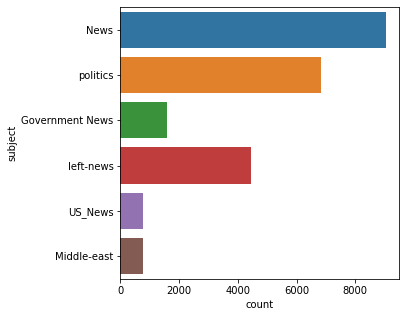

In [10]:
#Visualization
#Lets plot the subject as well many sources of news
plt.figure(figsize=(5,5))
sns.countplot(y = 'subject', data=Dataset_false) 

In [ ]:
Dataset_True.isnull().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
Dataset_True.shape

(21417, 4)

In [ ]:
Dataset_false.shape

(23481, 4)

In [ ]:
Dataset_false.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
Dataset_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
#adding status column for both fake and true
Dataset_True['isfake']=0
Dataset_True.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
Dataset_false['isfake']=1
Dataset_false.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
#Concatenating both datasets now and reset true for ordering
dataset_orginal=pd.concat([Dataset_True,Dataset_false]).reset_index(drop=True)
dataset_orginal


,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [8]:
dataset_orginal.drop(columns=['date'],inplace=True)

In [9]:
dataset_orginal

,title,text,subject,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1


In [10]:
#Merging title and text
dataset_orginal['Title_text']=dataset_orginal['title']+' '+dataset_orginal['text']
dataset_orginal.head()

,title,text,subject,isfake,Title_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...


In [17]:

print(dataset_orginal['Title_text'][0])


As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-

In [11]:
#Removing all the stop words
#dowloading stopwords to eliminate words like youre, at, that, this............
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
print(stopwords.words('english'))
stop_words=stopwords.words('english')


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3 and token not in stop_words:
            result.append(token)
    return result

In [14]:
dataset_orginal['clean']=dataset_orginal['Title_text'].apply(preprocess)

In [ ]:
print(dataset_orginal['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [15]:
wordsCount = []
for i in dataset_orginal.clean:
    for j in i:
        wordsCount.append(j)

In [ ]:
wordsCount

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [ ]:
len(wordsCount)

9278699

In [16]:
#unique
Unique_words = len(list(set(wordsCount)))
Unique_words

108706

In [17]:
#The words now needs to joined using lamda 
dataset_orginal['clean_joined']= dataset_orginal['clean'].apply(lambda x: " ".join(x))

In [25]:
dataset_orginal

,title,text,subject,isfake,Title_text,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class...",justice yahoo settles mail privacy class actio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor...",sunnistan allied safe zone plan territorial bo...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal...",blow million jazeera america finally calls qui...


In [ ]:
#sentence formation
dataset_orginal['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

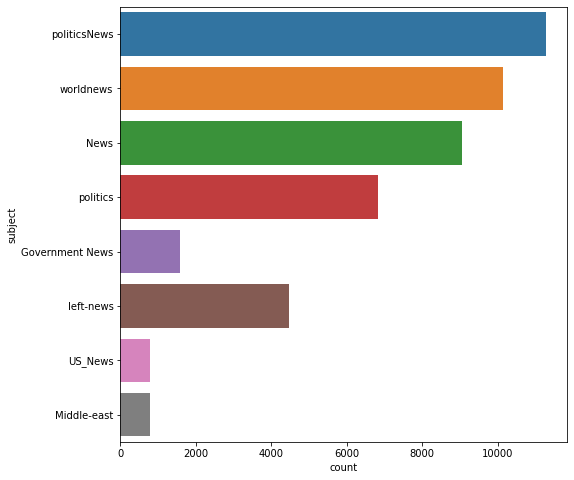

In [26]:
#Visualization
#Lets plot the subject as well many sources of news
plt.figure(figsize=(8,8))
sns.countplot(y = 'subject', data=dataset_orginal) 

In [27]:
dataset_orginal['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

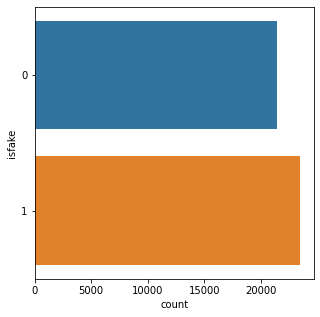

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y='isfake', data=dataset_orginal)

In [ ]:
dataset_orginal['isfake'].value_counts()

1    23481
0    21417
Name: isfake, dtype: int64

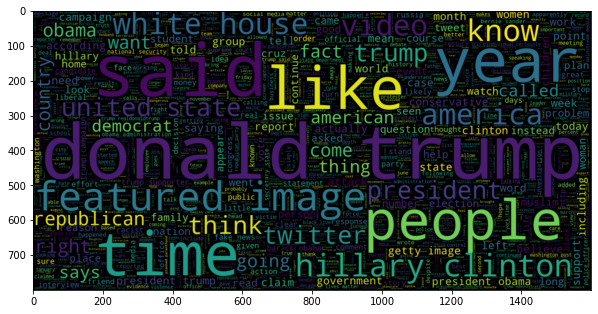

In [ ]:
#wordcloud
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
wc = WordCloud(max_words = 2000, width=1600, height=800, stopwords=stop_words).generate(" ".join(dataset_orginal[dataset_orginal.isfake==1].clean_joined))
plt.imshow(wc, interpolation='bilinear')

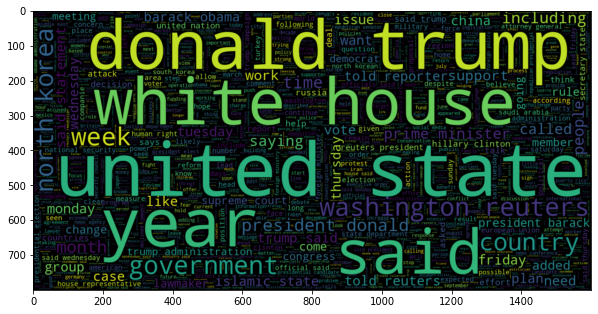

In [ ]:
#wordcount
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
wc = WordCloud(max_words = 2000, width=1600, height=800, stopwords=stop_words).generate(" ".join(dataset_orginal[dataset_orginal.isfake==0].clean_joined))
plt.imshow(wc, interpolation='bilinear')

In [18]:
#lets carry out the word embedding using tokenizer to make all rows have same number of words 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
maxlen = -1
for doc in dataset_orginal.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print('the maximum number of words in any document is:',maxlen)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
the maximum number of words in any document is: 4406


In [19]:
#lets train the model
x_train,x_test,y_train,y_test = train_test_split(dataset_orginal.clean_joined, dataset_orginal.isfake, test_size=0.2)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=Unique_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)


In [ ]:
print(train_sequences[0])

[1189, 1622, 14180, 778, 6966, 336, 156, 2837, 9, 222, 105, 407, 778, 2495, 2042, 1189, 156, 325, 4318, 1715, 1299, 27, 258, 310, 418, 911, 668, 1189, 243, 77, 50, 230, 35355, 27454, 104, 778, 6966, 54, 26226, 1034, 7618, 411, 2323, 4, 1301, 754, 27, 1948, 1570, 7323, 167, 28, 1644, 6169, 159, 181, 348, 402, 725, 1545, 6852, 1037, 2650, 1189, 1054, 706, 16332, 105, 284, 620, 2323, 243, 77, 5401, 1622, 627, 67, 69, 156, 336, 6966, 4847, 2208, 2323, 5599, 31, 3668, 846, 244, 1540, 1338, 61, 1756, 26, 1261, 846, 230, 549, 3150, 27454, 1438, 26, 2, 1189, 8351, 290, 2919, 115, 1622, 375, 1634, 2480, 284, 620, 1929, 105, 1715, 2007, 706, 2064, 1998, 1189, 85, 2712, 1622, 1676, 1189, 356, 185, 4821, 1634, 52, 11, 28853, 2712, 85, 1715, 1649, 661, 54, 4387, 1787, 116, 1093, 105, 2920, 114, 2546, 11, 1622, 3012, 145, 1966, 916, 129, 33, 376, 284, 620, 1329, 1111, 1715, 105, 37, 601, 9, 1222, 1925, 2, 27454, 4318, 392, 26226, 2042, 497, 156, 3624, 5021, 1329, 336, 118, 152, 27, 4733, 1329, 5569,

In [ ]:
print(test_sequences[0])

[1281, 46, 283, 1339, 744, 116, 714, 416, 9, 71, 3, 1087, 283, 963, 3, 3702, 1339, 1120, 2812, 111, 9126, 276, 285, 671, 15966, 384, 377, 388, 1281, 2, 310, 714, 1234, 283, 1339, 2025, 971, 315, 9126, 276, 59, 2157, 3293, 3519, 116, 4290, 7291, 116, 494, 1281, 2, 67, 9126, 224, 6342, 37, 390, 105, 426, 128, 543, 123, 4260, 3714, 3293, 1240, 784, 116, 4167, 330, 1196, 1220, 1340, 707, 283, 1339, 2, 2435, 962, 37, 390, 1878, 377, 426, 3288, 3326, 1086, 127, 209, 446, 2047, 1234, 129, 18, 4897, 2014, 5206, 2537, 1112, 8615, 706, 635, 1281, 2, 71, 963, 127, 675, 1811, 1829, 2590, 963, 19966, 37, 416, 1283, 2675, 1829, 556, 2368, 71, 10079, 127, 390, 37, 623, 521, 963, 21186, 4815, 2, 52, 401, 6054, 6789, 963, 19966, 963, 4815, 1062, 180, 143, 390, 253, 623, 11723, 71, 14576, 2, 1774, 3287, 1003, 1082, 71, 3175, 2590, 963, 398]


In [ ]:
len(train_sequences)

35918

In [ ]:
len(test_sequences)

In [ ]:
#print the encoding od the document
print('the encoding for document\n', dataset_orginal.clean_joined[0], '\n is :', train_sequences[0])

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_train = pad_sequences(train_sequences, maxlen=4406, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen=4406, padding='post', truncating='post')

In [ ]:
for i,doc in enumerate(padded_train[:2]):
    print('the padded encoding for documents ', i+1, "is:", doc)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Bidirectional, LSTM
model = Sequential()
model.add(Embedding(Unique_words, output_dim=128))
model.add(Bidirectional(LSTM(128)))

model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914368  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,210,561
Trainable params: 14,210,561
Non-trainable params: 0
_________________________________________________________________
None


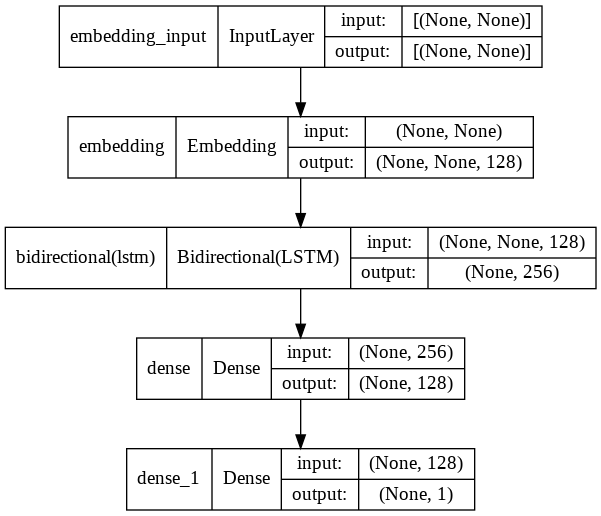

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
y_train = np.asarray(y_train)

In [34]:
model.fit(padded_train,y_train,batch_size=128, validation_split=0.1, epochs=2)

Epoch 1/2
253/253 [==============================] - 8614s 34s/step - loss: 0.0592 - acc: 0.9714 - val_loss: 0.0047 - val_acc: 0.9981
Epoch 2/2
253/253 [==============================] - 8341s 33s/step - loss: 8.8256e-04 - acc: 0.9998 - val_loss: 0.0034 - val_acc: 0.9986


In [35]:
pred = model.predict(padded_test)
prediction = []
for i in range(len(pred)):
    if pred[i].item()>0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(y_test), prediction)
print('bi-directional LSTM Model Accuracy:', accuracy)

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(list(y_test), prediction, average='binary')
print('F-Measure for bidirectional LSTM : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(list(y_test), prediction, average='binary')
print('Recall for bidirectional LSTM: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(list(y_test), prediction, average='binary')
print('Precision for bidirectional LSTM: %.3f' % precision)

bi-directional LSTM Model Accuracy: 0.9987750556792873
F-Measure for bidirectional LSTM : 0.999
Recall for bidirectional LSTM: 0.998
Precision for bidirectional LSTM: 0.999


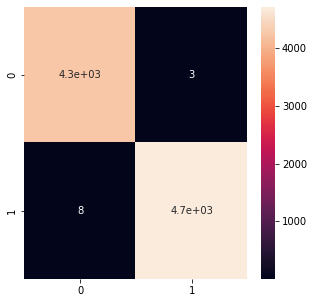

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)

In [24]:
model.fit(padded_train,y_train,batch_size=128, validation_split=0.1, epochs=1)

253/253 [==============================] - 9970s 39s/step - loss: 0.0686 - acc: 0.9703 - val_loss: 0.0064 - val_acc: 0.9983


In [25]:
pred = model.predict(padded_test)
prediction = []
for i in range(len(pred)):
    if pred[i].item()>0.5:
        prediction.append(1)
    else:
        prediction.append(0)
        


In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(y_test), prediction)
print('Model Accuracy:', accuracy)
#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(list(y_test), prediction, average='binary')
print('F-Measure for bidirectional LSTM : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(list(y_test), prediction, average='binary')
print('Recall for bidirectional LSTM: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(list(y_test), prediction, average='binary')
print('Precision for bidirectional LSTM: %.3f' % precision)

Model Accuracy: 0.9987750556792873
F-Measure for bidirectional LSTM : 0.999
Recall for bidirectional LSTM: 1.000
Precision for bidirectional LSTM: 0.998


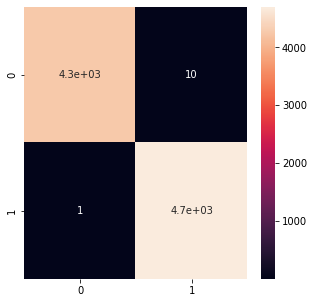

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)